In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import sys
import data_utils 
import vis_utils
from sklearn import neighbors
import time
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA
import image_utils

In [2]:
sys.path.insert(0, '/home/agervig/Desktop/final_stat')
data = pd.read_csv("data_proc.csv")
data = pd.DataFrame.to_numpy(data)
data = np.delete(data, 0, 1)
np.random.shuffle(data)

In [3]:
all_person_data = data_utils.split_data_all(data, 0.8)
disjunct_data = data_utils.split_data_disjunct(data, 0.8)

1


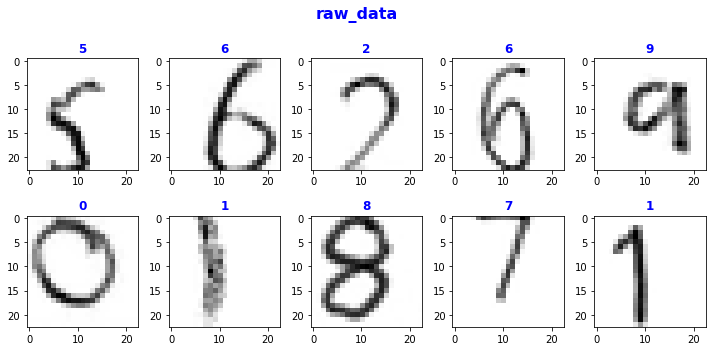

In [4]:
images = all_person_data[0][0:10]
labels = all_person_data[1][0:10]
print(len(images[0].shape))
vis_utils.visualize_generic(images, 2, 5, "raw_data", labels)

In [ ]:
print(images[0])

In [7]:
#Extracting random images from the data and visualizing these
random_indices = np.random.choice(data.shape[0], size=3, replace=False)
random_images = data[random_indices, :]
vis_utils.visualize_images(random_images, 1, 3, "Original data")


#Creating gaussian filter, smoothing images and visualizing images
blurred_images = []
for i in range(random_images.shape[0]):
    blurred_images.append(image_utils.blur_data(random_images[i], sigma=1)) 
blurred_images = np.array(blurred_images)
vis_utils.visualize_generic(blurred_images,1, 3, "Blurred images with sigma=1")


#Values for hyperparameters found in ex1 and with a sigma choosen arbitrary to 1:
sigma = 1
k = [1]
pct = 0.8

#Creating blurred data set
blurred_data = []
for i in range(data.shape[0]):
    blurred_data.append(image_utils.blur_data(data[i],sigma=sigma))
blurred_data = np.array(blurred_data)

#Visualizing the PCA data, the images are blurred before PCA is applied, in this example all PCs are used:
pca_visualization = PCA()
pca_vis_data = pca_visualization.fit_transform(blurred_data[:, 2:])
pca_vis_data = np.concatenate((blurred_data[:,0:2], pca_vis_data), axis=1)
vis_utils.visualize_generic(pca_vis_data[random_indices], 1, 3, "PCA data from blurred images")

NameError: name 'PCA_utils' is not defined

(10, 1)


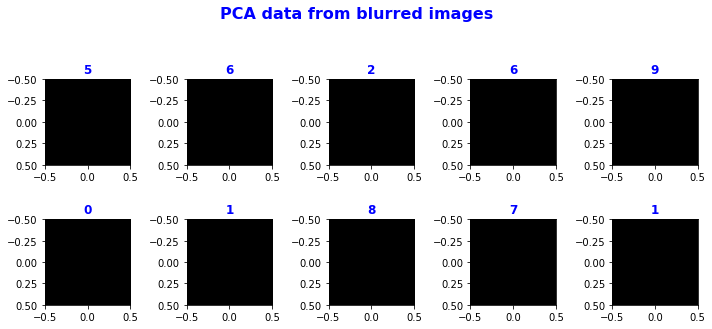

In [6]:
# pca_vis = PCA(n_components=1, svd_solver="full")
# pca_vis_data = pca_vis.fit_transform(images)
# vis_utils.visualize_generic(pca_vis_data, 2, 5, "", labels)

pca_visualization = PCA(n_components=1, svd_solver="full")
pca_vis_data = pca_visualization.fit_transform(images)
print(pca_vis_data.shape)
vis_utils.visualize_generic(pca_vis_data, 2, 5, "PCA data from blurred images", labels)


# pca_visualization = PCA()
# pca_vis_data = pca_visualization.fit_transform(images)
# print(pca_vis_data.shape)
# print(np.min(pca_vis_data))
#pca_vis_data = np.concatenate((images[:,0:2], pca_vis_data), axis=1)
#print(pca_vis_data[0].shape)
#vis_utils.visualize_generic(pca_vis_data, 2, 5, "PCA data from blurred images", labels)

In [5]:
def zeroCenter(dataset):
  mean = dataset.mean()
  std = dataset.std()
  dataset = dataset - mean
  dataset = dataset/std
  return dataset

In [6]:

def knnParamSearch(data_train, labels_train, data_test, labels_test, ks, metrics, pca_var, algorithm='brute'):
  n_test = len(data_test)
  results             = []
  methods             = []
  predictions         = []
  confusion_matrices  = []
  comp_times          = []
  for met in metrics:
    for k in ks:
      #We set the weights to uniform to obtain uniform importance of the k neighbors. Alternativly set this to "distance", to weight closer neighbors higher. 
      KNNC = neighbors.KNeighborsClassifier(k, weights='uniform', algorithm=algorithm, metric=met)
      KNNC.fit(data_train, labels_train)
      start = time.time()
      prediction = KNNC.predict(data_test)
      end = time.time()
      predictions.append(prediction)
      results.append(sum(prediction == labels_test)/n_test)
      methods.append([k, met])
      confusion_matrices.append(confusion_matrix(labels_test, prediction))
      comp_time = end - start
      comp_times.append(comp_time)

  return results, methods, predictions, confusion_matrices, comp_times

In [7]:
def knnEval(results,methods,confusion_matrices, comp_times):
  #Extracting unique indices from methods and splitting into metrics and k 
  ks = ([item[0] for item in methods])
  ks = list(dict.fromkeys(ks))
  metrics = ([item[1] for item in methods])
  metrics = list(dict.fromkeys(metrics))
  n_k = len(ks)
  n_m = len(metrics)
  padding = ' '
  str_results = [str(item) for item in results] #Used to ensure equal spacing when printing the results
  for j in range(n_m):
    print("Metric: ", metrics[j])
    for i in range(n_k):
      print("k neighbors:", f'{ks[i] :{padding}<{len(str(max(ks)))+10}}', "Acc: ", f'{results[i+j*n_k] :{padding}<{len(max(str_results, key=len))+10}}', "     Computational time: ", comp_times[i+j*n_k])

    
    if n_k == 1:
      continue
    print('\n')  
    print("Plot of mean accuracy for different value of k")
    plt.plot(ks, results[j*n_k : (j+1)*n_k], linewidth=2.0, marker=".", markerfacecolor="orange", markersize=12)
    plt.ylabel("mean accuracy")
    plt.xlabel("K")
    plt.show()
    print("_" * 100, "\n")

# Running KNN for all persons dataset (test set)


Metric:  euclidean
k neighbors: 1            Acc:  0.866969696969697                 Computational time:  18.29328751564026
k neighbors: 2            Acc:  0.8350757575757576                Computational time:  13.265833616256714
k neighbors: 3            Acc:  0.8543181818181819                Computational time:  13.92041277885437
k neighbors: 5            Acc:  0.8531060606060606                Computational time:  15.388397455215454
k neighbors: 10           Acc:  0.8407575757575757                Computational time:  15.315656423568726
k neighbors: 25           Acc:  0.8111363636363637                Computational time:  16.170005321502686


Plot of mean accuracy for different value of k


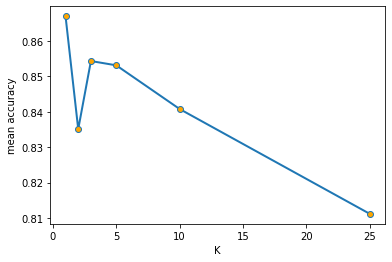

____________________________________________________________________________________________________ 



In [8]:

X_train = all_person_data[0]
Y_train = all_person_data[1]
X_test = all_person_data[2]
Y_test = all_person_data[3]


results, methods, predictions, confusion_matrices, comp_time = knnParamSearch(X_train, Y_train, X_test, Y_test, ks = [1, 2, 3, 5, 10, 25], metrics = ['euclidean'])
knnEval(results,methods,confusion_matrices, comp_time)

# Running KNN on all persons dataset (training set)

Metric:  euclidean
k neighbors: 1            Acc:  1.0                               Computational time:  31.990575075149536
k neighbors: 2            Acc:  0.9506051250970662                Computational time:  37.92953133583069
k neighbors: 3            Acc:  0.9553021837534802                Computational time:  42.359113454818726
k neighbors: 5            Acc:  0.941248887289532                 Computational time:  50.27218580245972
k neighbors: 10           Acc:  0.9188431599083317                Computational time:  49.026416301727295
k neighbors: 25           Acc:  0.886853917687835                 Computational time:  49.11587715148926


Plot of mean accuracy for different value of k


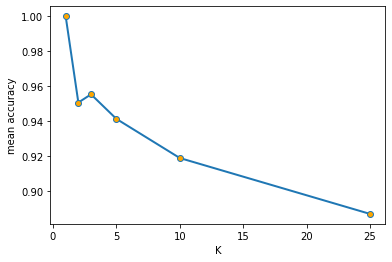

____________________________________________________________________________________________________ 



In [30]:
results, methods, predictions, confusion_matrices, comp_time = knnParamSearch(X_train, Y_train, X_train, Y_train, ks = [1, 2, 3, 5, 10, 25], metrics = ['euclidean'])
knnEval(results,methods,confusion_matrices, comp_time)

# Running KNN for disjunct dataset

# PCA

In [27]:
pca_data = data[:,2:]
pca = PCA(n_components=0.8, svd_solver="full")
pca_data = pca.fit_transform(pca_data)
pca_data = np.concatenate((data[:,0:2], pca_data), axis=1)

X_train, Y_train, X_test, Y_test = data_utils.split_data_all(pca_data, 0.8)


[[1, 'euclidean'], [2, 'euclidean'], [3, 'euclidean'], [5, 'euclidean'], [10, 'euclidean'], [25, 'euclidean']]


In [61]:

temp_data = data[:,2:]
var_pct = [0.99, 0.95, 90, 85, 80, 75]
ks = [1, 2, 3, 5, 10, 20]

# Running KNN on PCA data for all person dataset

In [83]:
accuracies_all = []
comp_times_all = []

for v in var_pct:
    pca = PCA(n_components=v, svd_solver="full")
    pca_data = pca.fit_transform(temp_data)
    pca_data = np.concatenate((data[:,0:2], pca_data), axis=1)
    X_train, Y_train, X_test, Y_test = data_utils.split_data_all(pca_data, 0.8)
    acc, methods, predictions, confusion_matrices, comp_time = knnParamSearch(X_train, Y_train, X_test, Y_test, ks = ks, metrics = ['euclidean'])
    accuracies_all.append(acc)
    comp_times_all.append(comp_time)


# Running KNN on PCA data for disjunct person dataset

In [84]:
accuracies_dis = []
comp_times_dis = []

for v in var_pct:
    pca = PCA(n_components=v, svd_solver="full")
    pca_data = pca.fit_transform(temp_data)
    pca_data = np.concatenate((data[:,0:2], pca_data), axis=1)
    X_train, Y_train, X_test, Y_test = data_utils.split_data_disjunct(pca_data, 0.8)
    acc, methods, predictions, confusion_matrices, comp_time = knnParamSearch(X_train, Y_train, X_test, Y_test, ks = ks, metrics = ['euclidean'])
    accuracies_dis.append(acc)
    comp_times_dis.append(comp_time)

# Evaluation

In [87]:
print(ks)

[1, 2, 3, 5, 10, 20]


In [134]:

# ac_max = np.max((np.max(accuracy_all), np.max(accuracy_dis))) + 0.05
# ac_min = np.min((np.min(accuracy_all), np.min(accuracy_dis))) - 0.05
# ct_max = np.max((np.max(comp_time_all), np.max(comp_time_dis))) + 1
# ct_min = np.min((np.min(comp_time_all), np.min(comp_time_dis))) - 1

def plot_result(acc_all, comp_all, acc_dis, comp_dis, ks, labels):


    ac_max_all = np.max(acc_all) + 0.05
    ac_min_all = np.min(acc_all) - 0.05
    ct_max_all = np.max(comp_all) + 1
    ct_min_all = np.min(comp_all) - 1
    ac_max_dis = np.max(acc_dis) + 0.05
    ac_min_dis = np.min(acc_dis) - 0.05
    ct_max_dis= np.max(comp_dis) + 2
    ct_min_dis = np.min(comp_dis) - 1

    fig, axs = plt.subplots(2, 2, figsize=(15,15))

    for i in range(len(acc_all)):
        axs[0,0].plot(ks, acc_all[i], linewidth=2.0, marker=".", markersize=12, label=labels[i])
        axs[0,1].plot(ks, comp_all[i], linewidth=2.0, marker=".", markersize=12, label=labels[i])
        axs[1,0].plot(ks, acc_dis[i], linewidth=2.0, marker=".", markersize=12, label=labels[i])
        axs[1,1].plot(ks, comp_dis[i], linewidth=2.0, marker=".", markersize=12, label=labels[i])

    axs[0,0].set(title="Accuracy for\n all persons dataset", xlabel="K", ylabel="Accuracy", ylim=(ac_min_all, ac_max_all))
    axs[0,0].legend()
    axs[0,0].grid(True)
    axs[0,1].set(title="Computational time for\n all persons dataset")
    axs[0,1].legend()
    axs[0,1].grid(True)
    axs[1,0].set(title="Accuracy for disjunct dataset", xlabel="K", ylabel="Accuracy", ylim=(ac_min_dis, ac_max_dis))
    axs[1,0].legend()
    axs[1,0].grid(True)
    axs[1,1].set(title="Computational time for disjunct dataset", xlabel="K", ylabel="Computational time", ylim=(ct_min_dis, ct_max_dis))
    axs[1,1].legend()
    axs[1,1].grid(True)


    plt.tight_layout()
    plt.draw()

In [99]:
accuracies_all_2 = []
comp_times_all_2 = []

var_pct_2 = [0.75, 0.70, 0.65, 0.55]

for v in var_pct_2:
    pca = PCA(n_components=v, svd_solver="full")
    pca_data = pca.fit_transform(temp_data)
    pca_data = np.concatenate((data[:,0:2], pca_data), axis=1)
    X_train, Y_train, X_test, Y_test = data_utils.split_data_all(pca_data, 0.8)
    acc, methods, predictions, confusion_matrices, comp_time = knnParamSearch(X_train, Y_train, X_test, Y_test, ks = ks, metrics = ['euclidean'])
    accuracies_all_2.append(acc)
    comp_times_all_2.append(comp_time)

In [137]:
accuracies_dis_2 = []
comp_times_dis_2 = []

var_pct_2 = [0.75, 0.70, 0.65, 0.55]

for v in var_pct_2:
    pca = PCA(n_components=v, svd_solver="full")
    pca_data = pca.fit_transform(temp_data)
    pca_data = np.concatenate((data[:,0:2], pca_data), axis=1)
    X_train, Y_train, X_test, Y_test = data_utils.split_data_disjunct(pca_data, 0.8)
    acc, methods, predictions, confusion_matrices, comp_time = knnParamSearch(X_train, Y_train, X_test, Y_test, ks = ks, metrics = ['euclidean'])
    accuracies_dis_2.append(acc)
    comp_times_dis_2.append(comp_time)

In [159]:
print("Max acc for all pearson      ", np.max(accuracies_all))
print("Max acc for dis              ", np.max(accuracies_dis))
print("Max acc for all pearson 2    ", np.max(accuracies_all_2))
print("Max acc for dis 2            ",np.max(accuracies_dis_2))



Max acc for all pearson       0.9034848484848484
Max acc for dis               0.7621428571428571
Max acc for all pearson 2     0.9129545454545455
Max acc for dis 2             0.7783571428571429


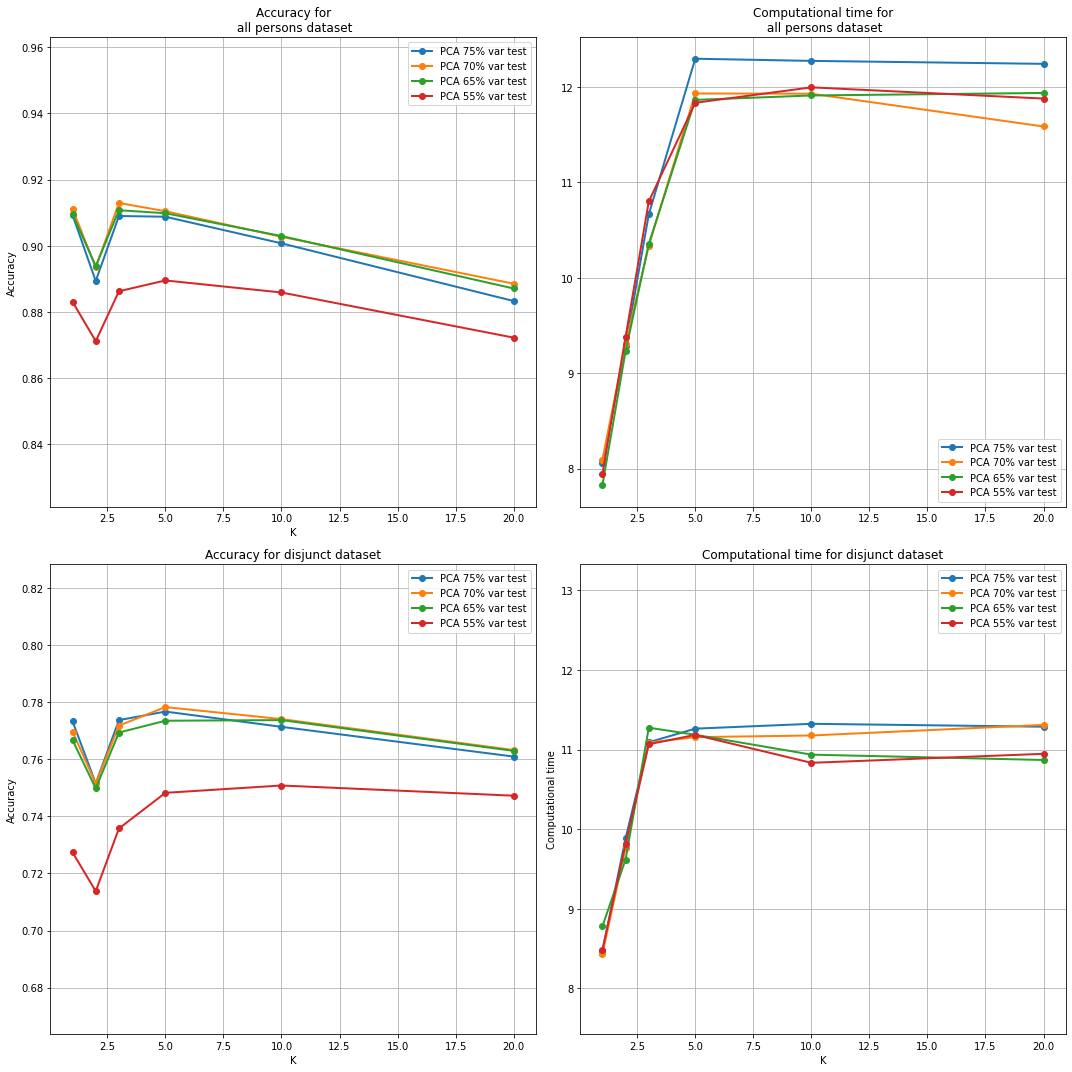

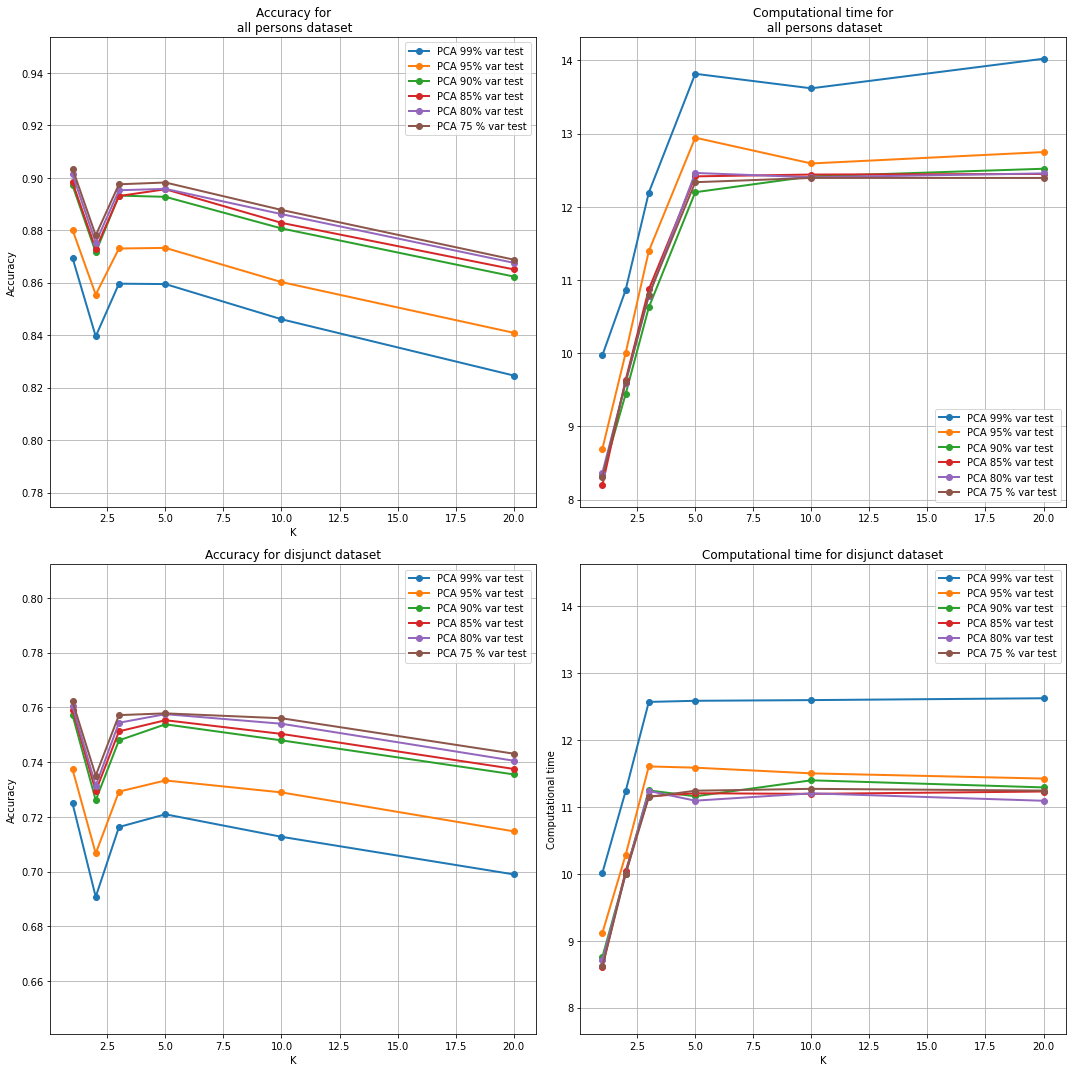

In [140]:

labels_2 = ["PCA 75% var test","PCA 70% var test","PCA 65% var test","PCA 55% var test"]
plot_result(accuracies_all_2, comp_times_all_2, accuracies_dis_2, comp_times_dis_2, ks, labels_2)
labels = ["PCA 99% var test","PCA 95% var test","PCA 90% var test","PCA 85% var test", "PCA 80% var test", "PCA 75 % var test"]
plot_result(accuracies_all, comp_times_all, accuracies_dis, comp_times_dis, ks, labels)